# Introduction

## Description of the problem 

The purpose of this project is to realize a system able to recognize different scenarios, in a home surveillance context using deep learning knowledge and techniques learned in this course.

This task arises from the need to find a solution to another past project that consisted in the realization of a low-cost video surveillance for a specific house using Raspberry Pi and a webcam. The free software used to remote monitoring and to record videos is called motion. It allows to send emails each time a movement is detected. In this specific house live 3 subjects: a woman, a dog and a man. The main problem of this software is that it is very sensitive to changes in images. It sends emails even if a non-real movement happens e.g. (changing of lights). In addition, it would be necessary to detect all the possible combinations of the 3 subjects and an additional situation where a group of people (at least 3) is present in the detection.

A CNN will be trained from ***scratch*** and another using a ***pre-trained CNN*** network. The aim of this notebook is to analyse the various results obtained during experiments in the implementation phase and to motivate the choices adopted in the selection of the model.



## Dataset

The dataset used for this project consists of a set of images collected using a **Raspberry Pi 3** Model B+ linked to a **Logitech Webcam C210**. The configuration of the software motion on Raspberry is set to take a picture each time a motion is detected and saved it on local memory. <br><br>
For more details see the link : (https://motion-project.github.io/motion_config.html)

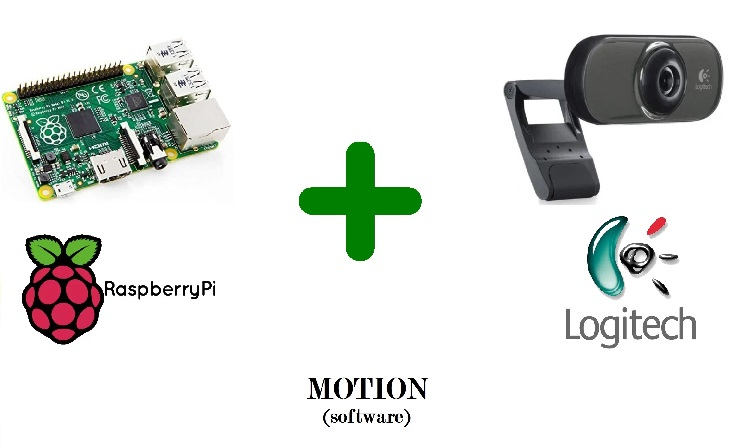

I collected 4500 images (640x480) containing 9 possible scenarios: 

1.   None is present 
2.   A man is present 
3.   A woman is present 
4.   A dog is present
5.   A man and a woman are present
6.   A man and a dog are present
7.   A woman and a dog are present
8.   A man, a woman and a dog are present
9.   People is present (at least 3)

The entire initial *raw* dataset is about 1GB of images and it is present at the location /content/drive/MyDrive/Vigna/RawDataset <br>


Here are some examples of 9 classes.

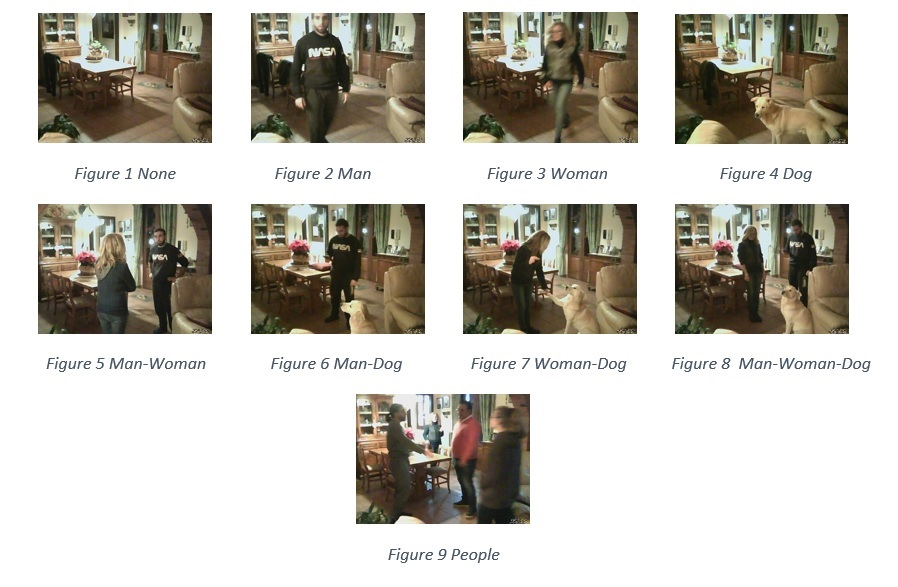

## Preparing the working dataset

The raw dataset needs to be splitted in 3 different sets, so it is selected randomly from the RawDataset folder:
- the 70% of images (3150) for the training set
- the 15% of images (675)  for the validation set
- the 15% of images (675)  for the test set

A  seed is set to replicate the same split of data in the random selection.

In [2]:
#Import all the required libraries
import os
import shutil
import random
import numpy as np
from PIL import Image

from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
# Mount drive 
drive.mount('/content/drive')

In [1]:
#Set parameters

SEED=44
CLASSES=['dog','man', 'man-dog','man-woman','man-woman-dog','none','people','woman','woman-dog']

#Paths to put the splitted dataset
BASE_PATH='/content/drive/MyDrive/Vigna/'
NEW_FOLDER='dataset'
RAW_PATH=os.path.join(BASE_PATH,'RawDataset')
NEW_PATH=os.path.join(BASE_PATH,NEW_FOLDER)
NEW_PATH_TRAIN=os.path.join(NEW_PATH,'train')
NEW_PATH_VALIDATION=os.path.join(NEW_PATH,'validation')
NEW_PATH_TEST=os.path.join(NEW_PATH,'test')


#Parameter to split the full dataset

PERC_VAL=15  #indicates in the % of the  dataset to use for validation 
PERC_TEST=15 #indicates in the % of the  dataset to use for testing 

#The remaining (100-PERC_VAL-PERC_TEST) is used to training

NameError: ignored

In [ ]:
#Creating the directories 
try:
  shutil.rmtree(NEW_PATH)
  print('Folder deleted!')
except:
  print('Probably folder not exists or was already deleted ') 

if not os.path.exists(NEW_PATH):
  os.makedirs(NEW_PATH)

if not os.path.exists(NEW_PATH_TRAIN):
  os.makedirs(NEW_PATH_TRAIN)

if not os.path.exists(NEW_PATH_VALIDATION):
  os.makedirs(NEW_PATH_VALIDATION)

if not os.path.exists(NEW_PATH_TEST):
  os.makedirs(NEW_PATH_TEST)

print ('All working directory are created!')

Probably folder was already deleted or not exists
All working directory are created!


In [ ]:
# Split the entire raw dataset in train and test samples.

np.random.seed(SEED)

for scenario in CLASSES:  #For each class, selecting the correct % of data
  
  if not os.path.exists(NEW_PATH_TRAIN+'/'+scenario):
    os.makedirs(NEW_PATH_TRAIN+'/'+scenario)

  if not os.path.exists(NEW_PATH_VALIDATION+'/'+scenario):
    os.makedirs(NEW_PATH_VALIDATION+'/'+scenario)

  if not os.path.exists(NEW_PATH_TEST+'/'+scenario):
    os.makedirs(NEW_PATH_TEST+'/'+scenario)

  OLD_PATH=RAW_PATH+'/'+scenario
  
  images_name=os.listdir(OLD_PATH)

  dataset=np.asarray(images_name)

  num_val_images=int((len(dataset)*PERC_VAL)/100) #Select the exact number of images used for validation
  num_test_images=int((len(dataset)*PERC_TEST)/100) #Select the exact number of images used for testing

  randomChoice=np.random.choice(dataset.shape[0],num_val_images+num_test_images, replace=False) # Select randomly (num_val_images+num_test_images) numbers in the range [0,dataset_length] without replacement.
  
  validChoice=randomChoice[:num_val_images] #Build a numpy array of integers representing the image to use for validation
  testChoice=randomChoice[(num_val_images):(num_val_images+num_test_images+1)]  #Build a numpy array of integers representing the image to use for validation

  for i in range(len(dataset)):
    image = Image.open(OLD_PATH+'/'+images_name[i]) #Copy image from old path
    if (i in validChoice):
      image.save(NEW_PATH_VALIDATION+'/'+scenario+'/'+images_name[i]) #Paste to new path
    elif (i in testChoice):
      image.save(NEW_PATH_TEST+'/'+scenario+'/'+images_name[i])
    else:
      image.save(NEW_PATH_TRAIN+'/'+scenario+'/'+images_name[i])
  print(scenario+' prepared!')

dog prepared!
man prepared!
man-dog prepared!
man-woman prepared!
man-woman-dog prepared!
none prepared!
people prepared!
woman prepared!
woman-dog prepared!


## View dataset info

Here some plots about the prepared dataset in the working directory

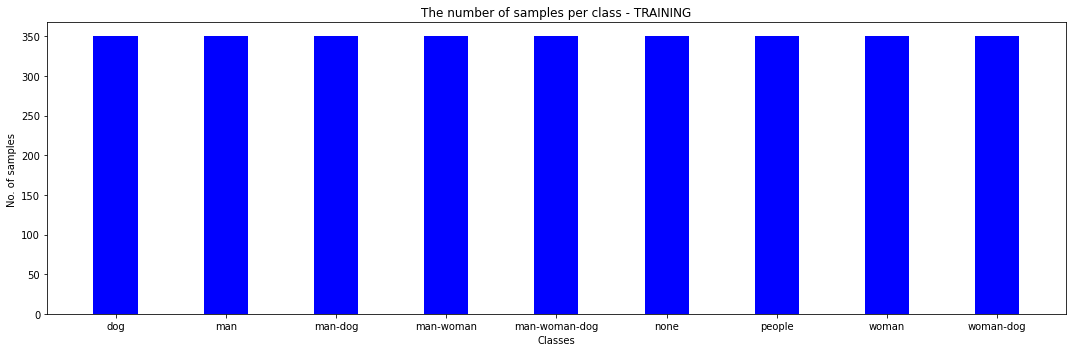

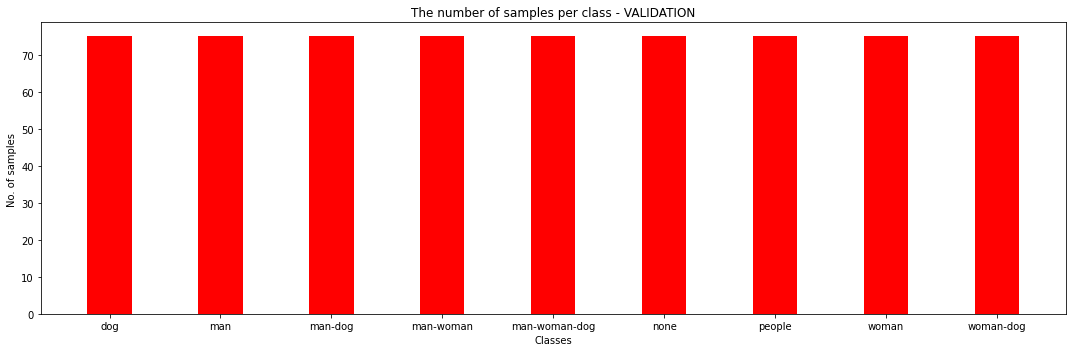

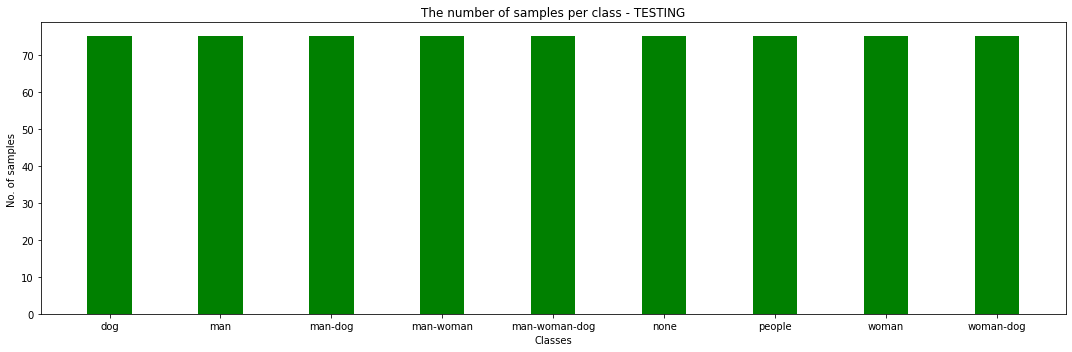

In [ ]:
#Check if the splitted dataset is balanced

#Function to plot a custom barchar
def drawBarPlot(plt,name,values,color,subtitle):
  plt.bar(name, values, width = 0.4, color=color)
  plt.xlabel("Classes")
  plt.ylabel("No. of samples ")
  plt.title("The number of samples per class - "+subtitle)
  plt.show()

subset=[]
numberTOTSamples=[]

classname=[];  # x-values
numberOfSamples=[];# y-values

#Training 
for scenario in CLASSES:  #For each class, check the number of image
  classname.append(scenario)
  numberOfSamples.append(len(os.listdir(NEW_PATH_TRAIN+'/'+scenario)))

# Plot bar chart with data points
drawBarPlot(plt,classname,numberOfSamples,'blue','TRAINING')

subset.append('Training')
numberTOTSamples.append(sum(numberOfSamples))
classname.clear()
numberOfSamples.clear()

#Validation 
for scenario in CLASSES:  #For each class, check the number of image
  classname.append(scenario)
  numberOfSamples.append(len(os.listdir(NEW_PATH_VALIDATION+'/'+scenario)))

# Plot bar chart with data points
drawBarPlot(plt,classname,numberOfSamples,'red','VALIDATION')

subset.append('Validation')
numberTOTSamples.append(sum(numberOfSamples))
classname.clear()
numberOfSamples.clear()

#Test 
for scenario in CLASSES:  #For each class, check the number of image
  classname.append(scenario)
  numberOfSamples.append(len(os.listdir(NEW_PATH_TEST+'/'+scenario)))

# Plot bar chart with data points
drawBarPlot(plt,classname,numberOfSamples,'green','TESTING')

subset.append('Testing')
numberTOTSamples.append(sum(numberOfSamples))



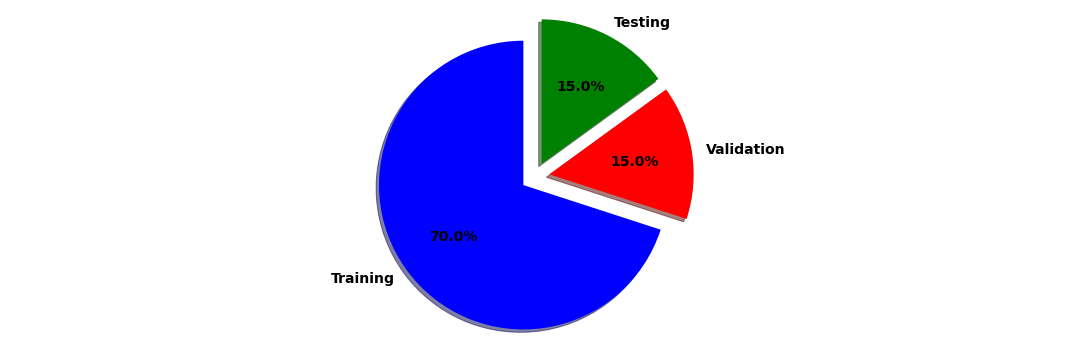

In [ ]:
# Pie chart representation of the new Dataset

explode = (0.1, 0.1, 0.1)  
colors = ("blue", "red", "green")
fig1, ax1 = plt.subplots()
ax1.pie(numberTOTSamples,  explode=explode,labels=subset, colors=colors,autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 14,'weight':'bold'})
ax1.axis('equal')  
plt.tight_layout()
plt.show()